## Order Process Analysis using PM4Py

🎯 Project Objective

Analyze an Order Management Process to:

Discover actual process flow

Find bottlenecks (delays)

Identify most common process paths

Analyze performance

Filter unwanted behavior

Improve process efficiency

### Project Structure

pm4py_order_project/

│

├── order_event_log.csv

├── main.py

└── results/


### Import Libraries

In [1]:
import pandas as pd
import pm4py

### Load Event Log

In [2]:
df = pd.read_csv("order_event_log.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [3]:
print(df.head())

   case_id        activity           timestamp
0        1  Order Received 2024-01-01 10:00:00
1        1    Payment Done 2024-01-01 10:05:00
2        1   Order Shipped 2024-01-01 12:00:00
3        2  Order Received 2024-01-01 11:00:00
4        2    Payment Done 2024-01-01 11:20:00


### Convert to PM4Py Format

In [4]:
log = pm4py.format_dataframe(
    df,
    case_id="case_id",
    activity_key="activity",
    timestamp_key="timestamp"
)

### Process Discovery (Petri Net)

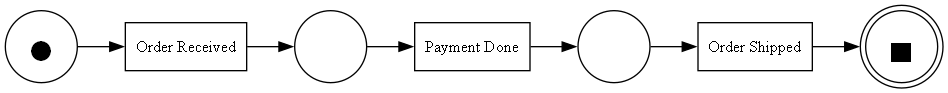

In [5]:
net, im, fm = pm4py.discover_petri_net_inductive(log)
pm4py.view_petri_net(net, im, fm)

### Directly-Follows Graph (DFG)

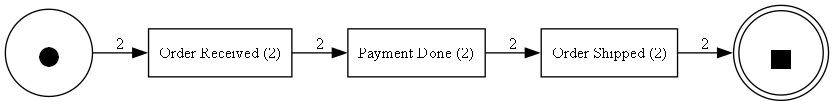

In [6]:
dfg, start_acts, end_acts = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_acts, end_acts)

### Performance Analysis (Bottleneck Detection)

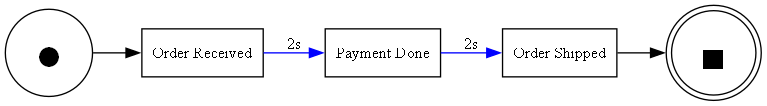

In [7]:
pm4py.view_performance_dfg(dfg, start_acts, end_acts)

### Process Variants Analysis

In [8]:
variants = pm4py.get_variants(log)
for v in variants:
    print(v)

('Order Received', 'Payment Done', 'Order Shipped')


### Filtering (Remove Noise)

In [13]:
case_counts = df.groupby("case_id").size()

valid_cases = case_counts[case_counts >= 3].index

filtered_df = df[df["case_id"].isin(valid_cases)]

filtered_log = pm4py.format_dataframe(
    filtered_df,
    case_id="case_id",
    activity_key="activity",
    timestamp_key="timestamp"
)

In [14]:
print("Original cases:", len(log))
print("Filtered cases:", len(filtered_log))

Original cases: 6
Filtered cases: 6


### Bottleneck Calculation (Advanced)

In [10]:
performance_dfg, start_acts, end_acts = pm4py.discover_performance_dfg(log)
print(performance_dfg)

{('Order Received', 'Payment Done'): {'mean': np.float64(750.0), 'median': np.float64(750.0), 'max': np.float64(1200.0), 'min': np.float64(300.0), 'sum': np.float64(1500.0), 'stdev': np.float64(636.3961030678928)}, ('Payment Done', 'Order Shipped'): {'mean': np.float64(8250.0), 'median': np.float64(8250.0), 'max': np.float64(9600.0), 'min': np.float64(6900.0), 'sum': np.float64(16500.0), 'stdev': np.float64(1909.1883092036783)}}


### Export Model (Industry Practice)

In [15]:
import os
os.makedirs("results", exist_ok=True)

In [16]:
pm4py.write_pnml(net, im, fm, "results/order_model.pnml")

In [17]:
import os
import pm4py

# create results folder
os.makedirs("results", exist_ok=True)

# save petri net
pm4py.write_pnml(net, im, fm, "results/order_model.pnml")

print("PNML file saved successfully")


PNML file saved successfully


### (Best for You Now — Python View)

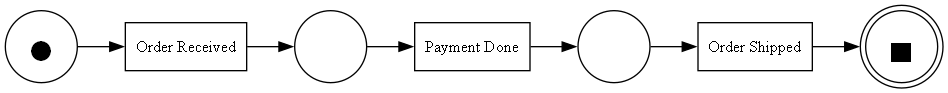

In [18]:
pm4py.view_petri_net(net, im, fm)